### Pengaruh Jumlah Vaksinasi Kelompok Umur Terhadap Jumlah Positif COVID-19

##### Data Preprocessing & EDA

In [1]:
import pandas as pd
import seaborn as sns
import warnings
import os

In [2]:
DATA_PARENT_DIR = 'dataset'
RAW_PARENT_DIR = os.path.join(DATA_PARENT_DIR, 'raw')
PROCESSED_PARENT_DIR = os.path.join(DATA_PARENT_DIR, 'processed')
FINAL_PARENT_DIR = os.path.join(DATA_PARENT_DIR, 'final')

In [3]:
data_inti = pd.read_csv(os.path.join(RAW_PARENT_DIR,'Data-jakarta-inti.csv'))
data_inti

,Tanggal,Meninggal,Sembuh,Self Isolation,Masih Perawatan,Total Pasien,Positif Harian,Positif Aktif,Sembuh Harian,Tanpa Gejala,Bergejala,Belum Ada Data
0,1/3/2020,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,2/3/2020,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,3/3/2020,1,0,0,2,3,3,2,0,NaN,NaN,NaN
3,4/3/2020,1,0,0,2,3,0,2,0,NaN,NaN,NaN
4,5/3/2020,3,0,0,4,7,4,4,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1212,26/06/2023,16115,1551828,124,67,1568134,10,191,25,0.0,2.0,189.0
1213,27/06/2023,16115,1551845,126,67,1568153,19,193,17,0.0,10.0,183.0
1214,28/06/2023,16115,1551857,129,63,1568164,11,192,12,0.0,10.0,182.0
1215,29/06/2023,16115,1551896,117,44,1568172,8,161,39,0.0,8.0,153.0


In [4]:
data_inti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1217 entries, 0 to 1216
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Tanggal          1217 non-null   object 
 1   Meninggal        1217 non-null   int64  
 2   Sembuh           1217 non-null   int64  
 3   Self Isolation   1217 non-null   int64  
 4   Masih Perawatan  1217 non-null   int64  
 5   Total Pasien     1217 non-null   int64  
 6   Positif Harian   1217 non-null   int64  
 7   Positif Aktif    1217 non-null   int64  
 8   Sembuh Harian    1217 non-null   int64  
 9   Tanpa Gejala     1077 non-null   float64
 10  Bergejala        1077 non-null   float64
 11  Belum Ada Data   1077 non-null   float64
dtypes: float64(3), int64(8), object(1)
memory usage: 114.2+ KB


In [5]:
data_inti.describe()

,Meninggal,Sembuh,Self Isolation,Masih Perawatan,Total Pasien,Positif Harian,Positif Aktif,Sembuh Harian,Tanpa Gejala,Bergejala,Belum Ada Data
count,1217.000000,1.217000e+03,1217.000000,1217.000000,1.217000e+03,1217.000000,1217.000000,1217.000000,1077.000000,1077.000000,1077.000000
mean,10072.846343,7.878787e+05,8337.393591,2549.302383,8.088383e+05,1288.666393,10886.712408,1275.285949,2400.154132,3257.987001,7491.037140
std,6118.361376,5.759436e+05,13253.205670,4203.942467,5.808345e+05,2187.176647,16950.004382,2364.124603,5212.739580,6812.538718,13057.840056
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-162.000000,0.000000,0.000000,0.000000
25%,3266.000000,1.629110e+05,1173.000000,287.000000,1.817130e+05,128.000000,1593.000000,121.000000,0.000000,6.000000,892.000000
50%,13561.000000,8.469420e+05,4142.000000,1081.000000,8.614270e+05,600.000000,6340.000000,584.000000,7.000000,35.000000,2554.000000
75%,15502.000000,1.363254e+06,9078.000000,3067.000000,1.393909e+06,1403.000000,12440.000000,1310.000000,1992.000000,4700.000000,7983.000000
max,16115.000000,1.551920e+06,88295.000000,30418.000000,1.568183e+06,15825.000000,113138.000000,20570.000000,35311.000000,60476.000000,88873.000000


In [6]:
# cek format yang betul
print(data_inti['Tanggal'][2])

3/3/2020


In [7]:
# Konversi kolom 'Tanggal' ke format datetime dengan menangkap data yang gagal dikonversi
failed_conversion = []
for index, value in data_inti['Tanggal'].items():
    try:
        pd.to_datetime(value, format="%d/%m/%Y")
    except ValueError:
        failed_conversion.append(index)

# Tampilkan indeks sel data yang memiliki format berbeda
for value in failed_conversion:
    print(data_inti['Tanggal'][value])

# diketahui perbedaan format hanya terletak pada imbuhan spasi di akhir string

13/03/2020 
14/03/2020 
15/03/2020 
16/03/2020 
17/03/2020 
18/03/2020 
19/03/2020 
20/03/2020 
21/03/2020 
22/03/2020 
23/03/2020 
24/03/2020 
25/03/2020 
26/03/2020 
27/03/2020 
28/03/2020 
29/03/2020 
30/03/2020 
31/03/2020 
13/04/2020 
14/04/2020 
15/04/2020 
16/04/2020 
17/04/2020 
18/04/2020 
19/04/2020 
20/04/2020 
21/04/2020 
22/04/2020 
23/04/2020 
24/04/2020 
25/04/2020 
26/04/2020 
27/04/2020 
28/04/2020 
29/04/2020 
30/04/2020 
13/05/2020 
14/05/2020 
15/05/2020 
16/05/2020 
17/05/2020 
18/05/2020 
19/05/2020 
20/05/2020 
21/05/2020 
22/05/2020 
23/05/2020 
24/05/2020 
25/05/2020 
26/05/2020 
27/05/2020 
28/05/2020 
29/05/2020 
30/05/2020 
31/05/2020 
13/06/2020 
14/06/2020 
15/06/2020 
16/06/2020 
17/06/2020 
18/06/2020 
19/06/2020 
20/06/2020 
21/06/2020 
22/06/2020 
23/06/2020 
24/06/2020 
25/06/2020 
26/06/2020 
27/06/2020 
28/06/2020 
29/06/2020 
30/06/2020 
13/07/2020 
14/07/2020 
15/07/2020 
16/07/2020 
17/07/2020 
18/07/2020 
19/07/2020 
20/07/2020 
21/07/2020 
22/0

In [8]:
# Hapus spasi di akhir string
data_inti['Tanggal'] = data_inti['Tanggal'].str.rstrip()

In [9]:
data_inti['Tanggal'] = pd.to_datetime(data_inti['Tanggal'], format="%d/%m/%Y")

In [10]:
data_suspek = pd.read_csv(os.path.join(RAW_PARENT_DIR,'Data-Suspek.csv'))
data_suspek

,Tanggal,Total Discarded,Discarded-IRS,Discarded-IR,Discarded-Meninggal,Discarded-Selesai Isolasi,Total Kontak Erat,Kontak Erat-IRS,Kontak Erat-IR,Kontak Erat-Meninggal,...,Probable-IRS,Probable-IR,Probable-Meninggal,Probable-Selesai Isolasi,Total Suspek,Suspek-IRS,Suspek-IR,Suspek-Meninggal,Suspek-Selesai Isolasi,GRAND TOTAL Data-Suspek
0,17-Jul-20,5712,NaN,NaN,NaN,5712,78725,NaN,5191,NaN,...,1.0,NaN,4,37,51507,981,504,2194,47828,137780.0
1,18-Jul-20,5713,NaN,NaN,NaN,5713,80382,NaN,6531,NaN,...,NaN,NaN,4,38,52081,780,584,2194,48523,140021.0
2,19-Jul-20,5713,NaN,NaN,NaN,5713,81327,NaN,7372,NaN,...,NaN,NaN,4,38,52586,1136,610,2194,48646,141471.0
3,20-Jul-20,5713,NaN,NaN,NaN,5713,81739,NaN,5547,NaN,...,NaN,NaN,4,38,52714,1067,602,2194,48851,142017.0
4,21-Jul-20,5643,NaN,NaN,NaN,5643,82860,NaN,5934,NaN,...,NaN,NaN,4,38,52957,1158,725,2194,48880,143326.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074,26-Jun-23,23248,NaN,NaN,1.0,23247,2031311,NaN,70,NaN,...,0.0,NaN,22732,12644,10395751,0,13504,2311,10379936,15706586.0
1075,27-Jun-23,23248,NaN,NaN,1.0,23247,2031316,NaN,67,NaN,...,0.0,NaN,22732,12644,10397286,0,13988,2311,10380987,15708381.0
1076,28-Jun-23,23248,NaN,NaN,1.0,23247,2031329,NaN,79,NaN,...,0.0,NaN,22732,12644,10398824,0,14305,2311,10382208,15710080.0
1077,29-Jun-23,23248,NaN,NaN,1.0,23247,2031335,NaN,73,NaN,...,0.0,NaN,22732,12644,10399828,0,13051,2311,10384466,15711196.0


In [11]:
data_suspek.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1079 entries, 0 to 1078
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Tanggal                            1079 non-null   object 
 1   Total Discarded                    1079 non-null   int64  
 2   Discarded-IRS                      0 non-null      float64
 3   Discarded-IR                       6 non-null      float64
 4   Discarded-Meninggal                1070 non-null   float64
 5   Discarded-Selesai Isolasi          1079 non-null   int64  
 6   Total Kontak Erat                  1079 non-null   int64  
 7   Kontak Erat-IRS                    2 non-null      float64
 8   Kontak Erat-IR                     1079 non-null   int64  
 9   Kontak Erat-Meninggal              0 non-null      float64
 10  Kontak Erat- Selesai Isolasi       1079 non-null   int64  
 11  Total Pelaku Perjalanan            1079 non-null   int64

In [12]:
data_suspek.describe()

,Total Discarded,Discarded-IRS,Discarded-IR,Discarded-Meninggal,Discarded-Selesai Isolasi,Total Kontak Erat,Kontak Erat-IRS,Kontak Erat-IR,Kontak Erat-Meninggal,Kontak Erat- Selesai Isolasi,...,Probable-IRS,Probable-IR,Probable-Meninggal,Probable-Selesai Isolasi,Total Suspek,Suspek-IRS,Suspek-IR,Suspek-Meninggal,Suspek-Selesai Isolasi,GRAND TOTAL Data-Suspek
count,1079.000000,0.0,6.000000,1070.0,1079.000000,1.079000e+03,2.000000,1079.000000,0.0,1.079000e+03,...,1057.000000,6.000000,1079.000000,1079.000000,1.079000e+03,1079.000000,1079.000000,1079.000000,1.079000e+03,1.078000e+03
mean,19922.222428,NaN,36.000000,1.0,19920.696942,1.528620e+06,1.500000,13309.270621,NaN,1.515310e+06,...,82.899716,5.333333,16450.383689,8461.385542,5.255062e+06,323.507878,99108.966636,2308.188137,5.153417e+06,8.272905e+06
std,5076.531804,NaN,28.085583,0.0,5077.166710,6.471182e+05,0.707107,15321.734704,NaN,6.557733e+05,...,190.350109,6.088240,8442.618085,4781.063774,4.010860e+06,639.068227,108668.265477,14.654804,3.999556e+06,5.901448e+06
min,5591.000000,NaN,2.000000,1.0,5591.000000,7.872500e+04,1.000000,8.000000,NaN,7.353400e+04,...,0.000000,1.000000,4.000000,37.000000,5.150700e+04,0.000000,504.000000,2194.000000,4.782800e+04,1.377800e+05
25%,17549.000000,NaN,10.500000,1.0,17548.000000,1.183238e+06,1.250000,1413.000000,NaN,1.142772e+06,...,23.000000,1.250000,6222.500000,2758.500000,8.353585e+05,13.000000,19549.000000,2311.000000,8.150670e+05,2.054672e+06
50%,22562.000000,NaN,45.000000,1.0,22561.000000,1.862242e+06,1.500000,7176.000000,NaN,1.860434e+06,...,38.000000,2.000000,22727.000000,11100.000000,6.133081e+06,34.000000,60188.000000,2311.000000,5.869446e+06,8.933616e+06
75%,23173.000000,NaN,60.000000,1.0,23172.000000,2.005902e+06,1.750000,23070.000000,NaN,2.004301e+06,...,53.000000,8.750000,22732.000000,12050.000000,9.279568e+06,139.000000,134829.000000,2311.000000,9.190802e+06,1.430596e+07
max,23248.000000,NaN,60.000000,1.0,23247.000000,2.031336e+06,2.000000,74079.000000,NaN,2.031280e+06,...,1665.000000,15.000000,22732.000000,12644.000000,1.040043e+07,2578.000000,430273.000000,2311.000000,1.038665e+07,1.571189e+07


In [13]:
data_suspek['Tanggal'] = pd.to_datetime(data_suspek['Tanggal'], format="%d-%b-%y")

In [14]:
# Menggabungkan data menggunakan metode left join
merged_data = pd.merge(data_inti, data_suspek, on='Tanggal', how='left')

# Mengisi nilai NaN dengan 0
merged_data = merged_data.fillna(0)

merged_data

,Tanggal,Meninggal,Sembuh,Self Isolation,Masih Perawatan,Total Pasien,Positif Harian,Positif Aktif,Sembuh Harian,Tanpa Gejala,...,Probable-IRS,Probable-IR,Probable-Meninggal,Probable-Selesai Isolasi,Total Suspek,Suspek-IRS,Suspek-IR,Suspek-Meninggal,Suspek-Selesai Isolasi,GRAND TOTAL Data-Suspek
0,2020-03-01,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-03-02,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-03-03,1,0,0,2,3,3,2,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-03-04,1,0,0,2,3,0,2,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-03-05,3,0,0,4,7,4,4,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1212,2023-06-26,16115,1551828,124,67,1568134,10,191,25,0.0,...,0.0,0.0,22732.0,12644.0,10395751.0,0.0,13504.0,2311.0,10379936.0,15706586.0
1213,2023-06-27,16115,1551845,126,67,1568153,19,193,17,0.0,...,0.0,0.0,22732.0,12644.0,10397286.0,0.0,13988.0,2311.0,10380987.0,15708381.0
1214,2023-06-28,16115,1551857,129,63,1568164,11,192,12,0.0,...,0.0,0.0,22732.0,12644.0,10398824.0,0.0,14305.0,2311.0,10382208.0,15710080.0
1215,2023-06-29,16115,1551896,117,44,1568172,8,161,39,0.0,...,0.0,0.0,22732.0,12644.0,10399828.0,0.0,13051.0,2311.0,10384466.0,15711196.0


In [15]:
# Menyimpan hasil penggabungan ke file CSV
merged_data.to_csv(os.path.join(PROCESSED_PARENT_DIR,'data-inti-suspek.csv'), index=False)

Merge data hasil lab dengan data-inti-suspek

In [16]:
data_inti_ver2 = pd.read_csv(os.path.join(PROCESSED_PARENT_DIR,'data-inti-suspek.csv'))
data_inti_ver2

,Tanggal,Meninggal,Sembuh,Self Isolation,Masih Perawatan,Total Pasien,Positif Harian,Positif Aktif,Sembuh Harian,Tanpa Gejala,...,Probable-IRS,Probable-IR,Probable-Meninggal,Probable-Selesai Isolasi,Total Suspek,Suspek-IRS,Suspek-IR,Suspek-Meninggal,Suspek-Selesai Isolasi,GRAND TOTAL Data-Suspek
0,2020-03-01,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-03-02,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-03-03,1,0,0,2,3,3,2,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-03-04,1,0,0,2,3,0,2,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-03-05,3,0,0,4,7,4,4,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1212,2023-06-26,16115,1551828,124,67,1568134,10,191,25,0.0,...,0.0,0.0,22732.0,12644.0,10395751.0,0.0,13504.0,2311.0,10379936.0,15706586.0
1213,2023-06-27,16115,1551845,126,67,1568153,19,193,17,0.0,...,0.0,0.0,22732.0,12644.0,10397286.0,0.0,13988.0,2311.0,10380987.0,15708381.0
1214,2023-06-28,16115,1551857,129,63,1568164,11,192,12,0.0,...,0.0,0.0,22732.0,12644.0,10398824.0,0.0,14305.0,2311.0,10382208.0,15710080.0
1215,2023-06-29,16115,1551896,117,44,1568172,8,161,39,0.0,...,0.0,0.0,22732.0,12644.0,10399828.0,0.0,13051.0,2311.0,10384466.0,15711196.0


In [17]:
data_lab = pd.read_csv(os.path.join(RAW_PARENT_DIR, 'Hasil Lab.csv'))
data_lab

,Tanggal,Jumlah Orang di Test,Orang Positif Harian,Orang Negatif Harian,Positivity Rate Kasus Baru Harian,Total Spesimen di Test,Positif,Negatif,Positivity Rate Spesimen Harian,Unnamed: 9
0,29/02/2020,40,0,40,0.00%,40,0,40,0.0%,NaN
1,1/3/2020,39,0,39,0.00%,39,0,39,0.0%,NaN
2,2/3/2020,3,0,3,0.00%,3,0,3,0.0%,NaN
3,3/3/2020,15,3,12,20.00%,15,3,12,20.0%,NaN
4,4/3/2020,7,0,7,0.00%,7,0,7,0.0%,NaN
...,...,...,...,...,...,...,...,...,...,...
1211,25/06/2023,437,10,427,2.30%,445,14,431,3.1%,NaN
1212,26/06/2023,842,19,823,2.30%,852,27,825,3.2%,NaN
1213,27/06/2023,1126,11,1115,1.00%,1168,46,1122,3.9%,NaN
1214,28/06/2023,749,8,741,1.10%,765,19,746,2.5%,NaN


In [18]:
#menghapus kolom terakhir yang tidak terpakai
data_lab = data_lab.iloc[:, :-1]

In [19]:
data_lab

,Tanggal,Jumlah Orang di Test,Orang Positif Harian,Orang Negatif Harian,Positivity Rate Kasus Baru Harian,Total Spesimen di Test,Positif,Negatif,Positivity Rate Spesimen Harian
0,29/02/2020,40,0,40,0.00%,40,0,40,0.0%
1,1/3/2020,39,0,39,0.00%,39,0,39,0.0%
2,2/3/2020,3,0,3,0.00%,3,0,3,0.0%
3,3/3/2020,15,3,12,20.00%,15,3,12,20.0%
4,4/3/2020,7,0,7,0.00%,7,0,7,0.0%
...,...,...,...,...,...,...,...,...,...
1211,25/06/2023,437,10,427,2.30%,445,14,431,3.1%
1212,26/06/2023,842,19,823,2.30%,852,27,825,3.2%
1213,27/06/2023,1126,11,1115,1.00%,1168,46,1122,3.9%
1214,28/06/2023,749,8,741,1.10%,765,19,746,2.5%


In [20]:
data_lab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216 entries, 0 to 1215
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Tanggal                            1216 non-null   object
 1   Jumlah Orang di Test               1216 non-null   int64 
 2   Orang Positif Harian               1216 non-null   int64 
 3   Orang Negatif Harian               1216 non-null   int64 
 4   Positivity Rate Kasus Baru Harian  1216 non-null   object
 5   Total Spesimen di Test             1216 non-null   int64 
 6   Positif                            1216 non-null   int64 
 7   Negatif                            1216 non-null   int64 
 8   Positivity Rate Spesimen Harian    1216 non-null   object
dtypes: int64(6), object(3)
memory usage: 85.6+ KB


In [21]:
data_lab.describe()

,Jumlah Orang di Test,Orang Positif Harian,Orang Negatif Harian,Total Spesimen di Test,Positif,Negatif
count,1216.000000,1216.000000,1216.000000,1216.000000,1216.000000,1216.000000
mean,10880.635691,1289.660362,9590.975329,13098.584704,2531.897204,10566.708059
std,9269.765350,2186.434526,7655.413649,11384.837356,4267.797395,7968.918300
min,3.000000,0.000000,3.000000,3.000000,0.000000,3.000000
25%,4082.000000,128.750000,3850.250000,4763.750000,299.000000,4222.000000
50%,9350.000000,600.500000,8337.500000,11582.000000,1085.500000,9713.500000
75%,14461.250000,1356.250000,13264.500000,17294.000000,2804.250000,14401.000000
max,60664.000000,15825.000000,49957.000000,86663.000000,33810.000000,52853.000000


In [22]:
data_inti_ver2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1217 entries, 0 to 1216
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Tanggal                            1217 non-null   object 
 1   Meninggal                          1217 non-null   int64  
 2   Sembuh                             1217 non-null   int64  
 3   Self Isolation                     1217 non-null   int64  
 4   Masih Perawatan                    1217 non-null   int64  
 5   Total Pasien                       1217 non-null   int64  
 6   Positif Harian                     1217 non-null   int64  
 7   Positif Aktif                      1217 non-null   int64  
 8   Sembuh Harian                      1217 non-null   int64  
 9   Tanpa Gejala                       1217 non-null   float64
 10  Bergejala                          1217 non-null   float64
 11  Belum Ada Data                     1217 non-null   float

In [23]:
data_inti_ver2['Tanggal'] = pd.to_datetime(data_inti_ver2['Tanggal'], format="%Y-%m-%d")

In [24]:
# Konversi kolom 'Tanggal' ke format datetime dengan menangkap data yang gagal dikonversi
failed_conversion = []
for index, value in data_lab['Tanggal'].items():
    try:
        pd.to_datetime(value, format="%d/%m/%Y")
    except ValueError:
        failed_conversion.append(index)

# Tampilkan indeks sel data yang memiliki format berbeda
for value in failed_conversion:
    print(data_lab['Tanggal'][value])

# diketahui perbedaan format : spasi di akhir string dan tambahan nol pada bulan

29/02/2020 
13/03/2020 
14/03/2020 
15/03/2020 
16/03/2020 
17/03/2020 
18/03/2020 
19/03/2020 
20/03/2020 
21/03/2020 
22/03/2020 
23/03/2020 
24/03/2020 
25/03/2020 
26/03/2020 
27/03/2020 
28/03/2020 
29/03/2020 
30/03/2020 
31/03/2020 
13/04/2020 
14/04/2020 
15/04/2020 
16/04/2020 
17/04/2020 
18/04/2020 
19/04/2020 
20/04/2020 
21/04/2020 
22/04/2020 
23/04/2020 
24/04/2020 
25/04/2020 
26/04/2020 
27/04/2020 
28/04/2020 
29/04/2020 
30/04/2020 
13/05/2020 
14/05/2020 
15/05/2020 
16/05/2020 
17/05/2020 
18/05/2020 
19/05/2020 
20/05/2020 
21/05/2020 
22/05/2020 
23/05/2020 
24/05/2020 
25/05/2020 
26/05/2020 
27/05/2020 
28/05/2020 
29/05/2020 
30/05/2020 
31/05/2020 
13/06/2020 
14/06/2020 
15/06/2020 
16/06/2020 
17/06/2020 
18/06/2020 
19/06/2020 
20/06/2020 
21/06/2020 
22/06/2020 
23/06/2020 
24/06/2020 
25/06/2020 
26/06/2020 
27/06/2020 
28/06/2020 
29/06/2020 
30/06/2020 
13/07/2020 
14/07/2020 
15/07/2020 
16/07/2020 
17/07/2020 
18/07/2020 
19/07/2020 
20/07/2020 
21/0

In [25]:
# cek data yang benar
print(data_lab['Tanggal'][2])

2/3/2020


In [26]:
# Hapus spasi di akhir string
data_lab['Tanggal'] = data_lab['Tanggal'].str.rstrip()

In [27]:
data_lab['Tanggal'] = pd.to_datetime(data_lab['Tanggal'], format="%d/%m/%Y", dayfirst=True)

In [28]:
# Menggabungkan data menggunakan metode left join
merged_data = pd.merge(data_inti_ver2, data_lab, on='Tanggal', how='left')

# Mengisi nilai NaN dengan 0
merged_data = merged_data.fillna(0)

merged_data

,Tanggal,Meninggal,Sembuh,Self Isolation,Masih Perawatan,Total Pasien,Positif Harian,Positif Aktif,Sembuh Harian,Tanpa Gejala,...,Suspek-Selesai Isolasi,GRAND TOTAL Data-Suspek,Jumlah Orang di Test,Orang Positif Harian,Orang Negatif Harian,Positivity Rate Kasus Baru Harian,Total Spesimen di Test,Positif,Negatif,Positivity Rate Spesimen Harian
0,2020-03-01,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,39.0,0.0,39.0,0.00%,39.0,0.0,39.0,0.0%
1,2020-03-02,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,3.0,0.0,3.0,0.00%,3.0,0.0,3.0,0.0%
2,2020-03-03,1,0,0,2,3,3,2,0,0.0,...,0.0,0.0,15.0,3.0,12.0,20.00%,15.0,3.0,12.0,20.0%
3,2020-03-04,1,0,0,2,3,0,2,0,0.0,...,0.0,0.0,7.0,0.0,7.0,0.00%,7.0,0.0,7.0,0.0%
4,2020-03-05,3,0,0,4,7,4,4,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1213,2023-06-26,16115,1551828,124,67,1568134,10,191,25,0.0,...,10379936.0,15706586.0,842.0,19.0,823.0,2.30%,852.0,27.0,825.0,3.2%
1214,2023-06-27,16115,1551845,126,67,1568153,19,193,17,0.0,...,10380987.0,15708381.0,1126.0,11.0,1115.0,1.00%,1168.0,46.0,1122.0,3.9%
1215,2023-06-28,16115,1551857,129,63,1568164,11,192,12,0.0,...,10382208.0,15710080.0,749.0,8.0,741.0,1.10%,765.0,19.0,746.0,2.5%
1216,2023-06-29,16115,1551896,117,44,1568172,8,161,39,0.0,...,10384466.0,15711196.0,384.0,11.0,373.0,2.90%,394.0,12.0,382.0,3.0%


In [29]:
# Menyimpan hasil penggabungan ke file CSV
merged_data.to_csv(os.path.join(PROCESSED_PARENT_DIR, 'data-inti-v2-lab.csv'), index=False)

Merge data pemakaman dengan data-inti-v2-lab

In [30]:
data_pemakaman = pd.read_csv(os.path.join(RAW_PARENT_DIR,'Pemakaman.csv'))
data_pemakaman

,Tanggal,Jumlah Laporan Pemakaman,Akumulasi Pemakaman,Harian Pemakaman Umum,Total Pemakaman Umum
0,1/3/2020,0.0,0,150,150
1,2/3/2020,0.0,0,136,286
2,3/3/2020,0.0,0,135,421
3,4/3/2020,0.0,0,116,537
4,5/3/2020,0.0,0,124,661
...,...,...,...,...,...
805,15/05/2022,NaN,34115,97,126666
806,16/05/2022,NaN,34115,95,126761
807,17/05/2022,1.0,34116,76,126837
808,18/05/2022,1.0,34117,65,126902


In [31]:
data_pemakaman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810 entries, 0 to 809
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tanggal                   810 non-null    object 
 1   Jumlah Laporan Pemakaman  765 non-null    float64
 2   Akumulasi Pemakaman       810 non-null    int64  
 3   Harian Pemakaman Umum     810 non-null    int64  
 4   Total Pemakaman Umum      810 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 31.8+ KB


In [32]:
data_pemakaman.describe()

,Jumlah Laporan Pemakaman,Akumulasi Pemakaman,Harian Pemakaman Umum,Total Pemakaman Umum
count,765.000000,810.000000,810.000000,810.000000
mean,44.597386,18160.528395,156.695062,66193.706173
std,60.628277,12437.060170,94.593396,40127.805990
min,0.000000,0.000000,21.000000,150.000000
25%,12.000000,5944.000000,112.000000,29954.750000
50%,31.000000,17498.000000,141.000000,64251.500000
75%,52.000000,32078.500000,164.000000,106013.000000
max,407.000000,34117.000000,833.000000,126923.000000


In [33]:
data_pemakaman['Tanggal'] = pd.to_datetime(data_pemakaman['Tanggal'], format="%d/%m/%Y")

In [34]:
data_inti_ver3 = pd.read_csv(os.path.join(PROCESSED_PARENT_DIR,'data-inti-v2-lab.csv'))
data_inti_ver3

,Tanggal,Meninggal,Sembuh,Self Isolation,Masih Perawatan,Total Pasien,Positif Harian,Positif Aktif,Sembuh Harian,Tanpa Gejala,...,Suspek-Selesai Isolasi,GRAND TOTAL Data-Suspek,Jumlah Orang di Test,Orang Positif Harian,Orang Negatif Harian,Positivity Rate Kasus Baru Harian,Total Spesimen di Test,Positif,Negatif,Positivity Rate Spesimen Harian
0,2020-03-01,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,39.0,0.0,39.0,0.00%,39.0,0.0,39.0,0.0%
1,2020-03-02,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,3.0,0.0,3.0,0.00%,3.0,0.0,3.0,0.0%
2,2020-03-03,1,0,0,2,3,3,2,0,0.0,...,0.0,0.0,15.0,3.0,12.0,20.00%,15.0,3.0,12.0,20.0%
3,2020-03-04,1,0,0,2,3,0,2,0,0.0,...,0.0,0.0,7.0,0.0,7.0,0.00%,7.0,0.0,7.0,0.0%
4,2020-03-05,3,0,0,4,7,4,4,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1213,2023-06-26,16115,1551828,124,67,1568134,10,191,25,0.0,...,10379936.0,15706586.0,842.0,19.0,823.0,2.30%,852.0,27.0,825.0,3.2%
1214,2023-06-27,16115,1551845,126,67,1568153,19,193,17,0.0,...,10380987.0,15708381.0,1126.0,11.0,1115.0,1.00%,1168.0,46.0,1122.0,3.9%
1215,2023-06-28,16115,1551857,129,63,1568164,11,192,12,0.0,...,10382208.0,15710080.0,749.0,8.0,741.0,1.10%,765.0,19.0,746.0,2.5%
1216,2023-06-29,16115,1551896,117,44,1568172,8,161,39,0.0,...,10384466.0,15711196.0,384.0,11.0,373.0,2.90%,394.0,12.0,382.0,3.0%


In [35]:
data_inti_ver3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Tanggal                            1218 non-null   object 
 1   Meninggal                          1218 non-null   int64  
 2   Sembuh                             1218 non-null   int64  
 3   Self Isolation                     1218 non-null   int64  
 4   Masih Perawatan                    1218 non-null   int64  
 5   Total Pasien                       1218 non-null   int64  
 6   Positif Harian                     1218 non-null   int64  
 7   Positif Aktif                      1218 non-null   int64  
 8   Sembuh Harian                      1218 non-null   int64  
 9   Tanpa Gejala                       1218 non-null   float64
 10  Bergejala                          1218 non-null   float64
 11  Belum Ada Data                     1218 non-null   float

In [36]:
data_inti_ver3['Tanggal'] = pd.to_datetime(data_inti_ver3['Tanggal'], format="%Y-%m-%d")

In [37]:
# Menggabungkan data menggunakan metode left join
merged_data = pd.merge(data_inti_ver3, data_pemakaman, on='Tanggal', how='left')

# Mengisi nilai NaN dengan 0
merged_data = merged_data.fillna(0)

merged_data

,Tanggal,Meninggal,Sembuh,Self Isolation,Masih Perawatan,Total Pasien,Positif Harian,Positif Aktif,Sembuh Harian,Tanpa Gejala,...,Orang Negatif Harian,Positivity Rate Kasus Baru Harian,Total Spesimen di Test,Positif,Negatif,Positivity Rate Spesimen Harian,Jumlah Laporan Pemakaman,Akumulasi Pemakaman,Harian Pemakaman Umum,Total Pemakaman Umum
0,2020-03-01,0,0,0,0,0,0,0,0,0.0,...,39.0,0.00%,39.0,0.0,39.0,0.0%,0.0,0.0,150.0,150.0
1,2020-03-02,0,0,0,0,0,0,0,0,0.0,...,3.0,0.00%,3.0,0.0,3.0,0.0%,0.0,0.0,136.0,286.0
2,2020-03-03,1,0,0,2,3,3,2,0,0.0,...,12.0,20.00%,15.0,3.0,12.0,20.0%,0.0,0.0,135.0,421.0
3,2020-03-04,1,0,0,2,3,0,2,0,0.0,...,7.0,0.00%,7.0,0.0,7.0,0.0%,0.0,0.0,116.0,537.0
4,2020-03-05,3,0,0,4,7,4,4,0,0.0,...,0.0,0,0.0,0.0,0.0,0,0.0,0.0,124.0,661.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1213,2023-06-26,16115,1551828,124,67,1568134,10,191,25,0.0,...,823.0,2.30%,852.0,27.0,825.0,3.2%,0.0,0.0,0.0,0.0
1214,2023-06-27,16115,1551845,126,67,1568153,19,193,17,0.0,...,1115.0,1.00%,1168.0,46.0,1122.0,3.9%,0.0,0.0,0.0,0.0
1215,2023-06-28,16115,1551857,129,63,1568164,11,192,12,0.0,...,741.0,1.10%,765.0,19.0,746.0,2.5%,0.0,0.0,0.0,0.0
1216,2023-06-29,16115,1551896,117,44,1568172,8,161,39,0.0,...,373.0,2.90%,394.0,12.0,382.0,3.0%,0.0,0.0,0.0,0.0


In [38]:
# Menyimpan hasil penggabungan ke file CSV
merged_data.to_csv(os.path.join(PROCESSED_PARENT_DIR, 'data-inti-v3-pemakaman.csv'), index=False)

Merge data RDT-ab dengan data-inti-v3-pemakaman

In [39]:
data_rdt = pd.read_csv(os.path.join(RAW_PARENT_DIR, 'RDT-ab.csv'))
data_rdt

,Tanggal,Reaktif,Non-Reaktif,Total,Reaktif Positivity Rate
0,27/03/2020,124,10839,10963,1.13%
1,28/03/2020,149,11858,12007,1.24%
2,29/03/2020,206,14808,15014,1.37%
3,30/03/2020,290,17619,17909,1.62%
4,31/03/2020,307,18242,18549,1.66%
...,...,...,...,...,...
1185,25/06/2023,41824,692123,733947,5.70%
1186,26/06/2023,41824,692123,733947,5.70%
1187,27/06/2023,41824,692123,733947,5.70%
1188,28/06/2023,41824,692123,733947,5.70%


In [40]:
data_rdt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Tanggal                  1190 non-null   object
 1   Reaktif                  1190 non-null   int64 
 2   Non-Reaktif              1190 non-null   int64 
 3   Total                    1190 non-null   int64 
 4   Reaktif Positivity Rate  1190 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.6+ KB


In [41]:
data_rdt.describe()

,Reaktif,Non-Reaktif,Total
count,1190.000000,1190.000000,1190.000000
mean,35032.642017,605992.270588,641024.912605
std,12286.214701,180010.242981,192144.356575
min,124.000000,10839.000000,10963.000000
25%,37852.000000,675591.000000,713443.000000
50%,41638.500000,691836.000000,733474.500000
75%,41823.000000,692119.000000,733942.000000
max,41824.000000,692123.000000,733947.000000


In [42]:
# Konversi kolom 'Tanggal' ke format datetime dengan menangkap data yang gagal dikonversi
failed_conversion = []
for index, value in data_rdt['Tanggal'].items():
    try:
        pd.to_datetime(value, format="%d/%m/%Y")
    except ValueError:
        failed_conversion.append(index)

# Tampilkan indeks sel data yang memiliki format berbeda
for value in failed_conversion:
    print(data_rdt['Tanggal'][value])

# Diketahui kesalahan format hanya terletak pada imbuhan spasi di akhir string

27/03/2020 
28/03/2020 
29/03/2020 
30/03/2020 
31/03/2020 
13/04/2020 
14/04/2020 
15/04/2020 
16/04/2020 
17/04/2020 
18/04/2020 
19/04/2020 
20/04/2020 
21/04/2020 
22/04/2020 
23/04/2020 
24/04/2020 
25/04/2020 
26/04/2020 
27/04/2020 
28/04/2020 
29/04/2020 
30/04/2020 
13/05/2020 
14/05/2020 
15/05/2020 
16/05/2020 
17/05/2020 
18/05/2020 
19/05/2020 
20/05/2020 
21/05/2020 
22/05/2020 
23/05/2020 
24/05/2020 
25/05/2020 
26/05/2020 
27/05/2020 
28/05/2020 
29/05/2020 
30/05/2020 
31/05/2020 
13/06/2020 
14/06/2020 
15/06/2020 
16/06/2020 
17/06/2020 
18/06/2020 
19/06/2020 
20/06/2020 
21/06/2020 
22/06/2020 
23/06/2020 
24/06/2020 
25/06/2020 
26/06/2020 
27/06/2020 
28/06/2020 
29/06/2020 
30/06/2020 
13/07/2020 
14/07/2020 
15/07/2020 
16/07/2020 
17/07/2020 
18/07/2020 
19/07/2020 
20/07/2020 
21/07/2020 
22/07/2020 
23/07/2020 
24/07/2020 
25/07/2020 
26/07/2020 
27/07/2020 
28/07/2020 
29/07/2020 
30/07/2020 
31/07/2020 
13/08/2020 
14/08/2020 
15/08/2020 
16/08/2020 
17/0

In [43]:
# Hapus spasi di akhir string
data_rdt['Tanggal'] = data_rdt['Tanggal'].str.rstrip()

In [44]:
data_rdt['Tanggal'] = pd.to_datetime(data_rdt['Tanggal'], format="%d/%m/%Y", dayfirst=True)

In [45]:
# read data-inti-v3-pemakaman.csv
data_inti_ver4 = pd.read_csv(os.path.join(PROCESSED_PARENT_DIR, 'data-inti-v3-pemakaman.csv'))
data_inti_ver4

,Tanggal,Meninggal,Sembuh,Self Isolation,Masih Perawatan,Total Pasien,Positif Harian,Positif Aktif,Sembuh Harian,Tanpa Gejala,...,Orang Negatif Harian,Positivity Rate Kasus Baru Harian,Total Spesimen di Test,Positif,Negatif,Positivity Rate Spesimen Harian,Jumlah Laporan Pemakaman,Akumulasi Pemakaman,Harian Pemakaman Umum,Total Pemakaman Umum
0,2020-03-01,0,0,0,0,0,0,0,0,0.0,...,39.0,0.00%,39.0,0.0,39.0,0.0%,0.0,0.0,150.0,150.0
1,2020-03-02,0,0,0,0,0,0,0,0,0.0,...,3.0,0.00%,3.0,0.0,3.0,0.0%,0.0,0.0,136.0,286.0
2,2020-03-03,1,0,0,2,3,3,2,0,0.0,...,12.0,20.00%,15.0,3.0,12.0,20.0%,0.0,0.0,135.0,421.0
3,2020-03-04,1,0,0,2,3,0,2,0,0.0,...,7.0,0.00%,7.0,0.0,7.0,0.0%,0.0,0.0,116.0,537.0
4,2020-03-05,3,0,0,4,7,4,4,0,0.0,...,0.0,0,0.0,0.0,0.0,0,0.0,0.0,124.0,661.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1213,2023-06-26,16115,1551828,124,67,1568134,10,191,25,0.0,...,823.0,2.30%,852.0,27.0,825.0,3.2%,0.0,0.0,0.0,0.0
1214,2023-06-27,16115,1551845,126,67,1568153,19,193,17,0.0,...,1115.0,1.00%,1168.0,46.0,1122.0,3.9%,0.0,0.0,0.0,0.0
1215,2023-06-28,16115,1551857,129,63,1568164,11,192,12,0.0,...,741.0,1.10%,765.0,19.0,746.0,2.5%,0.0,0.0,0.0,0.0
1216,2023-06-29,16115,1551896,117,44,1568172,8,161,39,0.0,...,373.0,2.90%,394.0,12.0,382.0,3.0%,0.0,0.0,0.0,0.0


In [46]:
data_inti_ver4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Tanggal                            1218 non-null   object 
 1   Meninggal                          1218 non-null   int64  
 2   Sembuh                             1218 non-null   int64  
 3   Self Isolation                     1218 non-null   int64  
 4   Masih Perawatan                    1218 non-null   int64  
 5   Total Pasien                       1218 non-null   int64  
 6   Positif Harian                     1218 non-null   int64  
 7   Positif Aktif                      1218 non-null   int64  
 8   Sembuh Harian                      1218 non-null   int64  
 9   Tanpa Gejala                       1218 non-null   float64
 10  Bergejala                          1218 non-null   float64
 11  Belum Ada Data                     1218 non-null   float

In [47]:
data_inti_ver4['Tanggal'] = pd.to_datetime(data_inti_ver4['Tanggal'], format="%Y-%m-%d")

In [48]:
# Menggabungkan data menggunakan metode left join
merged_data = pd.merge(data_inti_ver4, data_rdt, on='Tanggal', how='left')

# Mengisi nilai NaN dengan 0
merged_data = merged_data.fillna(0)

merged_data

,Tanggal,Meninggal,Sembuh,Self Isolation,Masih Perawatan,Total Pasien,Positif Harian,Positif Aktif,Sembuh Harian,Tanpa Gejala,...,Negatif,Positivity Rate Spesimen Harian,Jumlah Laporan Pemakaman,Akumulasi Pemakaman,Harian Pemakaman Umum,Total Pemakaman Umum,Reaktif,Non-Reaktif,Total,Reaktif Positivity Rate
0,2020-03-01,0,0,0,0,0,0,0,0,0.0,...,39.0,0.0%,0.0,0.0,150.0,150.0,0.0,0.0,0.0,0
1,2020-03-02,0,0,0,0,0,0,0,0,0.0,...,3.0,0.0%,0.0,0.0,136.0,286.0,0.0,0.0,0.0,0
2,2020-03-03,1,0,0,2,3,3,2,0,0.0,...,12.0,20.0%,0.0,0.0,135.0,421.0,0.0,0.0,0.0,0
3,2020-03-04,1,0,0,2,3,0,2,0,0.0,...,7.0,0.0%,0.0,0.0,116.0,537.0,0.0,0.0,0.0,0
4,2020-03-05,3,0,0,4,7,4,4,0,0.0,...,0.0,0,0.0,0.0,124.0,661.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1213,2023-06-26,16115,1551828,124,67,1568134,10,191,25,0.0,...,825.0,3.2%,0.0,0.0,0.0,0.0,41824.0,692123.0,733947.0,5.70%
1214,2023-06-27,16115,1551845,126,67,1568153,19,193,17,0.0,...,1122.0,3.9%,0.0,0.0,0.0,0.0,41824.0,692123.0,733947.0,5.70%
1215,2023-06-28,16115,1551857,129,63,1568164,11,192,12,0.0,...,746.0,2.5%,0.0,0.0,0.0,0.0,41824.0,692123.0,733947.0,5.70%
1216,2023-06-29,16115,1551896,117,44,1568172,8,161,39,0.0,...,382.0,3.0%,0.0,0.0,0.0,0.0,41824.0,692123.0,733947.0,5.70%


In [49]:
# Menyimpan hasil penggabungan ke file CSV
merged_data.to_csv(os.path.join(PROCESSED_PARENT_DIR, 'data-inti-v4-rdt.csv'), index=False)

Merge data vaksinasi dengan data-inti-v4-rdt

In [50]:
data_vaksinasi = pd.read_csv(os.path.join(RAW_PARENT_DIR, 'vaksinasi.csv'))
data_vaksinasi

,Tanggal,TV Nakes,V1 Nakes,V2 Nakes,P1 Nakes,P2 Nakes,TV Lansia,V1 Lansia,V2 Lansia,P1 Lansia,...,PVJ D1,PVJ D2,VGR V1,VGR V2,V3 Nakes,V3 MU,V3 Lansia,V4 Nakes,V4 MU,V4 Lansia
0,5-Mar-21,112301.0,141425.0,91078.0,125.90%,81.10%,911631.0,76451.0,0.0,8.39%,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,6-Mar-21,112301.0,144046.0,91379.0,128.30%,81.40%,911631.0,79421.0,0.0,8.71%,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,7-Mar-21,112301.0,177126.0,91460.0,157.70%,81.40%,911631.0,83628.0,0.0,9.17%,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,8-Mar-21,112301.0,181237.0,92988.0,161.40%,82.80%,911631.0,95140.0,1.0,10.44%,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,9-Mar-21,112301.0,113326.0,89984.0,100.90%,80.10%,911631.0,135128.0,675.0,14.82%,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,28-Jun-23,112301.0,184450.0,177138.0,164.20%,157.70%,992461.0,824399.0,742127.0,83.07%,...,#DIV/0!,#DIV/0!,227248.0,222576.0,103404,5345352.0,446479,84045,315803.0,591418
847,29-Jun-23,112301.0,184450.0,177138.0,164.20%,157.70%,992461.0,824399.0,742127.0,83.07%,...,#DIV/0!,#DIV/0!,227248.0,222576.0,103404,5345352.0,446479,84045,315803.0,591418
848,29-Jun-23,112301.0,184450.0,177138.0,164.20%,157.70%,992461.0,824399.0,742127.0,83.07%,...,#DIV/0!,#DIV/0!,227248.0,222576.0,103404,5345352.0,446479,84045,315803.0,591496
849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
data_vaksinasi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851 entries, 0 to 850
Data columns (total 48 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Tanggal         849 non-null    object 
 1   TV Nakes        849 non-null    float64
 2   V1 Nakes        849 non-null    float64
 3   V2 Nakes        849 non-null    float64
 4   P1 Nakes        849 non-null    object 
 5   P2 Nakes        849 non-null    object 
 6   TV Lansia       849 non-null    float64
 7   V1 Lansia       849 non-null    float64
 8   V2 Lansia       849 non-null    float64
 9   P1 Lansia       849 non-null    object 
 10  P2 Lansia       849 non-null    object 
 11  TV MU           849 non-null    float64
 12  V1 MU           849 non-null    float64
 13  V2 MU           849 non-null    float64
 14  P1 MU           849 non-null    object 
 15  P2 MU           849 non-null    object 
 16  TV DKI Total    849 non-null    float64
 17  V1 DKI Total    849 non-null    flo

In [52]:
data_vaksinasi.describe()

,TV Nakes,V1 Nakes,V2 Nakes,TV Lansia,V1 Lansia,V2 Lansia,TV MU,V1 MU,V2 MU,TV DKI Total,...,TV usia_tengah,V1 usia_tengah,V2 usia_tengah,TV usia_muda,V1 usia_muda,V2 usia_muda,VGR V1,VGR V2,V3 MU,V4 MU
count,849.0,849.000000,849.000000,849.000000,849.000000,849.000000,849.0,8.490000e+02,8.490000e+02,8.490000e+02,...,7.310000e+02,7.310000e+02,7.310000e+02,559.0,559.000000,559.000000,849.000000,849.000000,5.340000e+02,152.000000
mean,112301.0,172897.334511,162884.515901,949335.603062,748681.545347,660192.355713,1976757.0,9.569046e+06,7.651930e+06,8.948504e+06,...,9.933521e+05,1.247869e+06,1.005639e+06,1142505.0,823750.840787,662169.177102,191089.580683,180400.183746,4.241867e+06,278345.756579
std,0.0,21237.375067,25332.799793,71784.384577,120774.005328,159754.792795,0.0,3.612674e+06,3.469347e+06,2.286459e+06,...,3.817034e+03,2.908643e+05,3.025988e+05,0.0,81921.491800,170258.420445,75404.979702,79764.950100,1.471511e+06,84287.801077
min,112301.0,113326.000000,89984.000000,761279.000000,76451.000000,0.000000,1976757.0,6.412100e+04,0.000000e+00,3.000689e+06,...,9.847190e+05,6.820000e+02,0.000000e+00,1142505.0,123843.000000,19.000000,0.000000,0.000000,5.303200e+04,31041.000000
25%,112301.0,179781.000000,166415.000000,911631.000000,764676.000000,651907.000000,1976757.0,9.624944e+06,7.025165e+06,8.941211e+06,...,9.936870e+05,1.377790e+06,1.136853e+06,1142505.0,830005.500000,698579.000000,216652.000000,194922.000000,3.781593e+06,309202.000000
50%,112301.0,184450.000000,177138.000000,992461.000000,799339.000000,730493.000000,1976757.0,1.154290e+07,9.766393e+06,1.008372e+07,...,9.936870e+05,1.377790e+06,1.136853e+06,1142505.0,847694.000000,720924.000000,227248.000000,222576.000000,4.968662e+06,315803.000000
75%,112301.0,184450.000000,177138.000000,992461.000000,806776.000000,740444.000000,1976757.0,1.170196e+07,9.986242e+06,1.008372e+07,...,9.936870e+05,1.377790e+06,1.136853e+06,1142505.0,850152.000000,727166.000000,227248.000000,222576.000000,5.301612e+06,315803.000000
max,112301.0,184450.000000,177138.000000,992461.000000,829949.000000,742127.000000,1976757.0,1.180099e+07,1.003559e+07,1.008372e+07,...,1.000121e+06,1.377790e+06,1.136853e+06,1142505.0,852466.000000,730570.000000,227788.000000,223026.000000,5.345352e+06,315803.000000


In [53]:
data_vaksinasi['Tanggal'] = pd.to_datetime(data_vaksinasi['Tanggal'], format="%d-%b-%y")

In [54]:
# read data-inti-v4-rdt.csv
data_inti_ver5 = pd.read_csv(os.path.join(PROCESSED_PARENT_DIR, 'data-inti-v4-rdt.csv'))
data_inti_ver5

,Tanggal,Meninggal,Sembuh,Self Isolation,Masih Perawatan,Total Pasien,Positif Harian,Positif Aktif,Sembuh Harian,Tanpa Gejala,...,Negatif,Positivity Rate Spesimen Harian,Jumlah Laporan Pemakaman,Akumulasi Pemakaman,Harian Pemakaman Umum,Total Pemakaman Umum,Reaktif,Non-Reaktif,Total,Reaktif Positivity Rate
0,2020-03-01,0,0,0,0,0,0,0,0,0.0,...,39.0,0.0%,0.0,0.0,150.0,150.0,0.0,0.0,0.0,0
1,2020-03-02,0,0,0,0,0,0,0,0,0.0,...,3.0,0.0%,0.0,0.0,136.0,286.0,0.0,0.0,0.0,0
2,2020-03-03,1,0,0,2,3,3,2,0,0.0,...,12.0,20.0%,0.0,0.0,135.0,421.0,0.0,0.0,0.0,0
3,2020-03-04,1,0,0,2,3,0,2,0,0.0,...,7.0,0.0%,0.0,0.0,116.0,537.0,0.0,0.0,0.0,0
4,2020-03-05,3,0,0,4,7,4,4,0,0.0,...,0.0,0,0.0,0.0,124.0,661.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1213,2023-06-26,16115,1551828,124,67,1568134,10,191,25,0.0,...,825.0,3.2%,0.0,0.0,0.0,0.0,41824.0,692123.0,733947.0,5.70%
1214,2023-06-27,16115,1551845,126,67,1568153,19,193,17,0.0,...,1122.0,3.9%,0.0,0.0,0.0,0.0,41824.0,692123.0,733947.0,5.70%
1215,2023-06-28,16115,1551857,129,63,1568164,11,192,12,0.0,...,746.0,2.5%,0.0,0.0,0.0,0.0,41824.0,692123.0,733947.0,5.70%
1216,2023-06-29,16115,1551896,117,44,1568172,8,161,39,0.0,...,382.0,3.0%,0.0,0.0,0.0,0.0,41824.0,692123.0,733947.0,5.70%


In [55]:
data_inti_ver5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 54 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Tanggal                            1218 non-null   object 
 1   Meninggal                          1218 non-null   int64  
 2   Sembuh                             1218 non-null   int64  
 3   Self Isolation                     1218 non-null   int64  
 4   Masih Perawatan                    1218 non-null   int64  
 5   Total Pasien                       1218 non-null   int64  
 6   Positif Harian                     1218 non-null   int64  
 7   Positif Aktif                      1218 non-null   int64  
 8   Sembuh Harian                      1218 non-null   int64  
 9   Tanpa Gejala                       1218 non-null   float64
 10  Bergejala                          1218 non-null   float64
 11  Belum Ada Data                     1218 non-null   float

In [56]:
data_inti_ver5['Tanggal'] = pd.to_datetime(data_inti_ver5['Tanggal'], format="%Y-%m-%d")

In [57]:
# Menggabungkan data menggunakan metode left join
merged_data = pd.merge(data_inti_ver5, data_vaksinasi, on='Tanggal', how='left')

# Mengisi nilai NaN dengan 0
merged_data = merged_data.fillna(0)

merged_data

,Tanggal,Meninggal,Sembuh,Self Isolation,Masih Perawatan,Total Pasien,Positif Harian,Positif Aktif,Sembuh Harian,Tanpa Gejala,...,PVJ D1,PVJ D2,VGR V1,VGR V2,V3 Nakes,V3 MU,V3 Lansia,V4 Nakes,V4 MU,V4 Lansia
0,2020-03-01,0,0,0,0,0,0,0,0,0.0,...,0,0,0.0,0.0,0,0.0,0,0,0.0,0
1,2020-03-02,0,0,0,0,0,0,0,0,0.0,...,0,0,0.0,0.0,0,0.0,0,0,0.0,0
2,2020-03-03,1,0,0,2,3,3,2,0,0.0,...,0,0,0.0,0.0,0,0.0,0,0,0.0,0
3,2020-03-04,1,0,0,2,3,0,2,0,0.0,...,0,0,0.0,0.0,0,0.0,0,0,0.0,0
4,2020-03-05,3,0,0,4,7,4,4,0,0.0,...,0,0,0.0,0.0,0,0.0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215,2023-06-27,16115,1551845,126,67,1568153,19,193,17,0.0,...,#DIV/0!,#DIV/0!,227248.0,222576.0,103404,5345352.0,446479,84045,315803.0,591418
1216,2023-06-28,16115,1551857,129,63,1568164,11,192,12,0.0,...,#DIV/0!,#DIV/0!,227248.0,222576.0,103404,5345352.0,446479,84045,315803.0,591418
1217,2023-06-29,16115,1551896,117,44,1568172,8,161,39,0.0,...,#DIV/0!,#DIV/0!,227248.0,222576.0,103404,5345352.0,446479,84045,315803.0,591418
1218,2023-06-29,16115,1551896,117,44,1568172,8,161,39,0.0,...,#DIV/0!,#DIV/0!,227248.0,222576.0,103404,5345352.0,446479,84045,315803.0,591496


In [58]:
# Menyimpan hasil penggabungan ke file CSV
merged_data.to_csv(os.path.join(PROCESSED_PARENT_DIR, 'data-inti-final.csv'), index=False)

##### Feature Engineering & Modelling

In [59]:
data = pd.read_csv(os.path.join(PROCESSED_PARENT_DIR, 'data-inti-final.csv'))

In [60]:
data

,Tanggal,Meninggal,Sembuh,Self Isolation,Masih Perawatan,Total Pasien,Positif Harian,Positif Aktif,Sembuh Harian,Tanpa Gejala,...,PVJ D1,PVJ D2,VGR V1,VGR V2,V3 Nakes,V3 MU,V3 Lansia,V4 Nakes,V4 MU,V4 Lansia
0,2020-03-01,0,0,0,0,0,0,0,0,0.0,...,0,0,0.0,0.0,0,0.0,0,0,0.0,0
1,2020-03-02,0,0,0,0,0,0,0,0,0.0,...,0,0,0.0,0.0,0,0.0,0,0,0.0,0
2,2020-03-03,1,0,0,2,3,3,2,0,0.0,...,0,0,0.0,0.0,0,0.0,0,0,0.0,0
3,2020-03-04,1,0,0,2,3,0,2,0,0.0,...,0,0,0.0,0.0,0,0.0,0,0,0.0,0
4,2020-03-05,3,0,0,4,7,4,4,0,0.0,...,0,0,0.0,0.0,0,0.0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215,2023-06-27,16115,1551845,126,67,1568153,19,193,17,0.0,...,#DIV/0!,#DIV/0!,227248.0,222576.0,103404,5345352.0,446479,84045,315803.0,591418
1216,2023-06-28,16115,1551857,129,63,1568164,11,192,12,0.0,...,#DIV/0!,#DIV/0!,227248.0,222576.0,103404,5345352.0,446479,84045,315803.0,591418
1217,2023-06-29,16115,1551896,117,44,1568172,8,161,39,0.0,...,#DIV/0!,#DIV/0!,227248.0,222576.0,103404,5345352.0,446479,84045,315803.0,591418
1218,2023-06-29,16115,1551896,117,44,1568172,8,161,39,0.0,...,#DIV/0!,#DIV/0!,227248.0,222576.0,103404,5345352.0,446479,84045,315803.0,591496


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1220 entries, 0 to 1219
Columns: 101 entries, Tanggal to V4 Lansia
dtypes: float64(69), int64(12), object(20)
memory usage: 962.8+ KB


In [62]:
data.describe()

,Meninggal,Sembuh,Self Isolation,Masih Perawatan,Total Pasien,Positif Harian,Positif Aktif,Sembuh Harian,Tanpa Gejala,Bergejala,...,V1 usia_muda,V2 usia_muda,VGR V1,VGR V2,V3 Nakes,V3 MU,V3 Lansia,V4 Nakes,V4 MU,V4 Lansia
count,1220.000000,1.220000e+03,1220.000000,1220.000000,1.220000e+03,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,...,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1.220000e+03,1220.000000,1220.000000,1220.000000,1220.000000
mean,10087.438525,7.897136e+05,8319.486885,2543.457377,8.106640e+05,1285.967213,10862.960656,1272.488525,2118.824590,2876.131148,...,378136.331148,303999.147541,133165.821311,125723.222951,41318.850000,1.860975e+06,129785.009836,14766.330328,34679.143443,66671.174590
std,6117.898803,5.764218e+05,13241.854578,4200.420115,5.812849e+05,2185.173064,16935.946260,2361.889110,4957.986152,6485.782477,...,414404.778477,349685.951008,108083.068629,106365.191799,47077.799531,2.320658e+06,198216.136355,31363.173893,96628.784661,171480.602755
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-162.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,3281.750000,1.643885e+05,1169.000000,282.000000,1.832295e+05,127.750000,1587.750000,121.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,13562.000000,8.470435e+05,4131.000000,1075.000000,8.615815e+05,597.500000,6327.000000,580.500000,1.000000,22.000000,...,0.000000,0.000000,224730.500000,214071.500000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,15509.750000,1.367120e+06,9051.000000,3058.750000,1.397917e+06,1392.500000,12365.000000,1302.500000,1405.250000,4189.000000,...,846357.750000,719252.500000,227248.000000,222576.000000,95651.750000,4.799983e+06,415846.500000,0.000000,0.000000,0.000000
max,16115.000000,1.551920e+06,88295.000000,30418.000000,1.568183e+06,15825.000000,113138.000000,20570.000000,35311.000000,60476.000000,...,852466.000000,730570.000000,227788.000000,223026.000000,103404.000000,5.345352e+06,446479.000000,84045.000000,315803.000000,591496.000000


In [63]:
data.columns

Index(['Tanggal', 'Meninggal', 'Sembuh', 'Self Isolation', 'Masih Perawatan',
       'Total Pasien', 'Positif Harian', 'Positif Aktif', 'Sembuh Harian',
       'Tanpa Gejala',
       ...
       'PVJ D1', 'PVJ D2', 'VGR V1', 'VGR V2', 'V3 Nakes', 'V3 MU',
       'V3 Lansia', 'V4 Nakes ', 'V4 MU', 'V4 Lansia'],
      dtype='object', length=101)

In [64]:
# Choose columns to be used
columns_used = ['Tanggal',
            'Jumlah Orang di Test',
            'Orang Positif Harian',
            'Positivity Rate Kasus Baru Harian',
            'Total Spesimen di Test',
            'Positif',
            'Positivity Rate Spesimen Harian',
            'V1 usia_atas',
            'V2 usia_atas',
            'V1 usia_tengah',
            'V2 usia_tengah',
            'V1 usia_muda',
            'V2 usia_muda']

# Filter data by used columns
data = data[columns_used]

In [65]:
# Save data
data.to_csv(os.path.join(FINAL_PARENT_DIR, 'data-fiks.csv'), index=False)

------------------------------------------------------------------------------

In [66]:
data = pd.read_csv(os.path.join(FINAL_PARENT_DIR, 'data-fiks.csv'))
data = data.drop_duplicates()

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1219 entries, 0 to 1219
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Tanggal                            1219 non-null   object 
 1   Jumlah Orang di Test               1219 non-null   float64
 2   Orang Positif Harian               1219 non-null   float64
 3   Positivity Rate Kasus Baru Harian  1219 non-null   object 
 4   Total Spesimen di Test             1219 non-null   float64
 5   Positif                            1219 non-null   float64
 6   Positivity Rate Spesimen Harian    1219 non-null   object 
 7   V1 usia_atas                       1219 non-null   float64
 8   V2 usia_atas                       1219 non-null   float64
 9   V1 usia_tengah                     1219 non-null   float64
 10  V2 usia_tengah                     1219 non-null   float64
 11  V1 usia_muda                       1219 non-null   float

In [68]:
data.describe()

,Jumlah Orang di Test,Orang Positif Harian,Total Spesimen di Test,Positif,V1 usia_atas,V2 usia_atas,V1 usia_tengah,V2 usia_tengah,V1 usia_muda,V2 usia_muda
count,1219.000000,1219.000000,1219.000000,1219.000000,1.219000e+03,1.219000e+03,1.219000e+03,1.219000e+03,1219.000000,1219.000000
mean,10854.140279,1286.495488,13066.639048,2525.675964,5.549666e+06,4.473182e+06,7.483119e+05,6.030537e+05,377747.217391,303649.212469
std,9273.713966,2184.670389,11389.001636,4264.379581,4.545969e+06,3.855299e+06,6.517953e+05,5.457652e+05,414351.835610,349615.705348
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,4038.000000,127.500000,4724.500000,290.500000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,9341.000000,594.000000,11553.000000,1081.000000,8.999064e+06,7.006498e+06,8.843840e+05,7.466260e+05,0.000000,0.000000
75%,14455.500000,1353.000000,17280.000000,2785.500000,9.606609e+06,8.201941e+06,1.377790e+06,1.136853e+06,846270.000000,719158.500000
max,60664.000000,15825.000000,86663.000000,33810.000000,9.755185e+06,8.345307e+06,1.377790e+06,1.136853e+06,852466.000000,730570.000000


<AxesSubplot: >

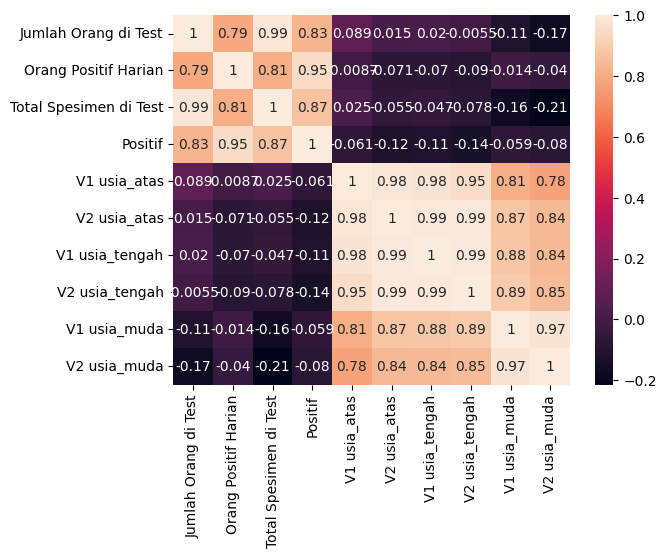

In [69]:
sns.heatmap(data.select_dtypes('float64').corr(), annot=True)

Bisa dilihat bahwa Vaksin 1 dan 2 pada Usia tengah memiliki korelasi yang paling berlawanan dengan jumlah orang positif harian dibandingkan kelompok umur lainya, itu berati vaksinasi pada kelompok usia tengah memiliki dampat terbesar atas naik atau turunya jumlah positif harian

Kita akan menggunakan data orang positif harian dari positifity rate sebagai output predict yang ingin kita berikan,
dengan parameter :
- Jumlah orang yang di tes
- V1 Usia_atas
- V2 Usia_atas
- V1 Usia_tengah
- V2 Usia_tengah
- V1 Usia_muda
- V2 Usia_muda

In [70]:
features = ['V1 usia_atas','V2 usia_atas','V1 usia_tengah','V2 usia_tengah','V1 usia_muda','V2 usia_muda']
out = ['Positivity Rate Kasus Baru Harian']

X = data[features]
Y = data[out]

In [71]:
warnings.filterwarnings('ignore')

Y.loc[:,'Positivity Rate Kasus Baru Harian'] = Y['Positivity Rate Kasus Baru Harian'].str.replace('%', '')
Y.loc[:,'Positivity Rate Kasus Baru Harian'] = Y['Positivity Rate Kasus Baru Harian'].astype(float)

In [72]:
X

,V1 usia_atas,V2 usia_atas,V1 usia_tengah,V2 usia_tengah,V1 usia_muda,V2 usia_muda
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
1215,9755185.0,8345301.0,1377790.0,1136853.0,852466.0,730570.0
1216,9755185.0,8345301.0,1377790.0,1136853.0,852466.0,730570.0
1217,9755185.0,8345301.0,1377790.0,1136853.0,852466.0,730570.0
1218,9755185.0,8345307.0,1377790.0,1136853.0,852466.0,730570.0


In [73]:
Y

,Positivity Rate Kasus Baru Harian
0,0.0
1,0.0
2,20.0
3,0.0
4,0.0
...,...
1215,1.0
1216,1.1
1217,2.9
1218,2.9


Splitting and test some test regression model
- Linear regression
- Decission tree regression
- Bayessian ridge regression
- Random forest regression
- XGBoost regression

In [74]:
# Splitting train and Test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [75]:
# Decission Tree Regression

from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MAE : ", mean_absolute_error(y_test, predictions))
print("MSE : ", mean_squared_error(y_test, predictions))

MAE :  2.653634613716581
MSE :  28.07821958920397


In [76]:
# Random Forrest Regression

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MAE : ", mean_absolute_error(y_test, predictions))
print("MSE : ", mean_squared_error(y_test, predictions))

MAE :  2.6405027470333717
MSE :  27.98367948194512


In [77]:
# Linear Regression

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MAE : ", mean_absolute_error(y_test, predictions))
print("MSE : ", mean_squared_error(y_test, predictions))

MAE :  5.308303725865621
MSE :  52.377319116969616


In [78]:
# Bayesian Ridge Regression

from sklearn.linear_model import BayesianRidge

model = BayesianRidge()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MAE : ", mean_absolute_error(y_test, predictions))
print("MSE : ", mean_squared_error(y_test, predictions))

MAE :  5.308238926812716
MSE :  52.37608289783678


In [79]:
# XGBoost Regression

from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MAE : ", mean_absolute_error(y_test, predictions))
print("MSE : ", mean_squared_error(y_test, predictions))

MAE :  2.761444455305285
MSE :  28.345117236811607


K - Fold, with 10 fold for choosing the best model

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold

k = 5
kf = KFold(n_splits=k)

results = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

    # Model
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)

    dt_model = DecisionTreeRegressor()
    dt_model.fit(X_train, y_train)
    
    rf_model = RandomForestRegressor()
    rf_model.fit(X_train, y_train)
    
    br_model = BayesianRidge()
    br_model.fit(X_train, y_train)
    
    xgb_model = GradientBoostingRegressor()
    xgb_model.fit(X_train, y_train)

    # Predict
    lr_pred = lr_model.predict(X_test)
    dt_pred = dt_model.predict(X_test)
    rf_pred = rf_model.predict(X_test)
    br_pred = br_model.predict(X_test)
    xgb_pred = xgb_model.predict(X_test)
    
    
    # Metrics
    lr_mae = mean_absolute_error(y_test, lr_pred)
    lr_mse = mean_squared_error(y_test, lr_pred)
    dt_mae = mean_absolute_error(y_test, dt_pred)
    dt_mse = mean_squared_error(y_test, dt_pred)
    rf_mae = mean_absolute_error(y_test, rf_pred)
    rf_mse = mean_squared_error(y_test, rf_pred)
    br_mae = mean_absolute_error(y_test, br_pred)
    br_mse = mean_squared_error(y_test, br_pred)
    xgb_mae = mean_absolute_error(y_test, xgb_pred)
    xgb_mse = mean_squared_error(y_test, xgb_pred)

    fold_results = {
        'Model': ['Linear Regression', 'Decision Tree Regression', 'Random Forest Regression', 'Bayesian Ridge Regression', 'XGBoost Regression'],
        'MAE': [lr_mae, dt_mae, rf_mae, br_mae, xgb_mae],
        'MSE': [lr_mse, dt_mse, rf_mse, br_mse, xgb_mse]
    }
    
    results.append(pd.DataFrame(fold_results))

results_metrics = pd.concat(results, ignore_index=True)

In [81]:
results_metrics.groupby('Model').mean().sort_values(['MSE','MAE'])

,MAE,MSE
Model,,
XGBoost Regression,9.038236,1.229971e+02
Random Forest Regression,9.322015,1.316806e+02
Decision Tree Regression,11.705524,2.588212e+02
Bayesian Ridge Regression,52.252042,1.935904e+04
Linear Regression,622.097596,8.198997e+06


Dikarenakan Gradient Boosting memiliki hasil yang paling bagus, maka akan di gunakan

In [82]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(X, Y)

GradientBoostingRegressor()

Dengan memasukkan jumlah orang yang telah di vaksin pada masing masing kelompok umur dan tingkat vaksin, lalu memberikan jumlah orang yang ingin di test, maka model dapat memberikan prediksi jumlah orang positive dari orang yang di test berdasarkan jumlah vaksin sebagai parameter tadi

In [83]:
params = {
    'Jumlah Orang di Test': 100000,
    'V1 usia_atas' : 2000000,
    'V2 usia_atas' : 3000000,
    'V1 usia_tengah' : 10000000,
    'V2 usia_tengah' : 30000000,
    'V1 usia_muda' : 1000000,
    'V2 usia_muda' : 5000000,
}

def predictPositive(params):
    params = pd.DataFrame(params, index=[0])
    new_params = params.drop(columns=['Jumlah Orang di Test'])
    percent = model.predict(new_params)[0]
    positive = int(params['Jumlah Orang di Test'] * percent / 100 )
    return positive

predictPositive(params)

16396